# Create Neural Network with Python

In [1]:
import numpy
import scipy.special

In [17]:
# initialize neural network class
class Neural_Network:
      
    # initialise the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):        
        print('Input Nodes: ', input_nodes, 
              'Hidden Nodes: ', hidden_nodes, 
              'Output Nodes: ', output_nodes)
        
        self.W_ih = (numpy.random.rand(hidden_nodes, input_nodes) - 0.5)
        self.W_ho = (numpy.random.rand(output_nodes, hidden_nodes) - 0.5)

        print('Matrix W_input_hidden: ', '\n', self.W_ih)
        print('Matrix W_hidden_output: ', '\n', self.W_ho)
        
        self.lr = learning_rate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)        

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # FORWARD PASS
        
        hidden_inputs = numpy.dot(self.W_ih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.W_ho, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        # BACKWARD PASS

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.W_ho.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.W_ho += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), hidden_outputs.T)
        
        # update the weights for the links between the input and hidden layers
        self.W_ih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), inputs.T)

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.W_ih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.W_ho, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [18]:
neural_network = Neural_Network(input_nodes=3, 
                                hidden_nodes=3, 
                                output_nodes=3, 
                                learning_rate=0.01)

Input Nodes:  3 Hidden Nodes:  3 Output Nodes:  3
Matrix W_input_hidden:  
 [[-0.07757523  0.1788525  -0.32636987]
 [-0.29908157 -0.40122818 -0.27171119]
 [ 0.29822655  0.40269056  0.29365071]]
Matrix W_hidden_output:  
 [[ 0.48083579  0.20983494  0.21942197]
 [-0.30102245 -0.21573444 -0.35922101]
 [ 0.23947851 -0.12365043 -0.46187409]]


In [19]:
neural_network.query([0.1, 0.3, 0.5])

array([[0.6087957 ],
       [0.39165456],
       [0.44884281]])

In [20]:
n_of_epochs = 5000

for epoch in range(n_of_epochs):
    neural_network.train([0.1, 0.3, 0.5], [0.8, 0.8, 0.8])
print('---Training Fininshed---\n')

---Training Fininshed---



In [21]:
neural_network.query([0.1, 0.3, 0.5])

array([[0.78492482],
       [0.76367741],
       [0.77036833]])

# MNIST DATASET TRAINING

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
mnist_dataset_file_path = '/content/drive/MyDrive/AI Class/2023-1/mnist_dataset/mnist_train_100.csv'

In [30]:
import csv
import numpy as np

In [40]:
train_images, train_labels = [], []

with open(mnist_dataset_file_path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row_id, row in enumerate(csv_reader):
    
      label = int(row[0])
      image_data = np.asfarray(row[1:])
    
      train_labels.append(label)
      train_images.append(image_data)

print('Train Images: ', len(train_images))
print('Train Labels: ', len(train_labels))

Train Images:  100
Train Labels:  100


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 7 
Image shape: (784,)


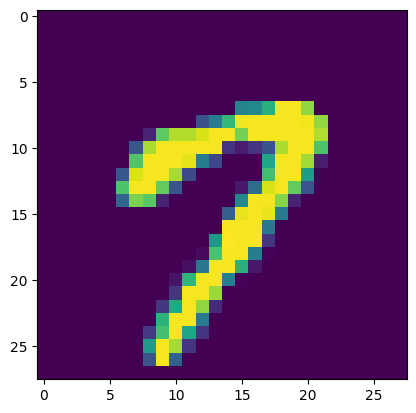

In [51]:
index = 15
print('Label:', train_labels[index], 
      '\nImage shape:', train_images[index].shape)

plt.imshow(train_images[index].reshape(28, 28))
plt.show()

## Create Neural Network for MNIST

In [42]:
from tqdm import tqdm

In [64]:
MNIST_neural_network = Neural_Network(input_nodes=784, 
                                      hidden_nodes=200, 
                                      output_nodes=10, 
                                      learning_rate=0.01)

Input Nodes:  784 Hidden Nodes:  200 Output Nodes:  10
Matrix W_input_hidden:  
 [[ 0.14490788 -0.44504181  0.047778   ...  0.28747123 -0.37577231
  -0.34230781]
 [-0.39237741 -0.27039061  0.35594517 ...  0.43689154  0.11768326
   0.10957212]
 [-0.45544468  0.10365494  0.25117325 ... -0.40737172 -0.28049416
  -0.28150407]
 ...
 [-0.01205599 -0.35612393 -0.26992747 ... -0.25959931 -0.0294127
   0.28812414]
 [ 0.28357634 -0.47815142 -0.3220497  ... -0.49034659 -0.19058119
  -0.12866155]
 [-0.30155699 -0.12728915 -0.16959856 ...  0.27535886 -0.06596136
   0.36416749]]
Matrix W_hidden_output:  
 [[ 0.04807095  0.40347017 -0.24690614 ...  0.48347585 -0.34064176
  -0.22154703]
 [-0.24693224  0.40393322 -0.29115562 ... -0.41278101 -0.17931102
   0.3629027 ]
 [-0.19622544  0.46091647 -0.46002241 ... -0.19393434 -0.25758903
   0.09482286]
 ...
 [-0.21179678  0.24139297 -0.18277426 ...  0.19748709  0.00743514
  -0.2261856 ]
 [-0.33512956 -0.37938479 -0.24386009 ...  0.14955518  0.14436412
   0.3

## TRAIN NEURAL NETWORK

In [65]:
n_of_epochs = 50

for epoch in range(n_of_epochs):
    print('Epoch: ', epoch)

    for i in tqdm(range(len(train_images))):

        train_image = train_images[i]
        train_label_index = train_labels[i]

        train_label = np.zeros(10)
        train_label[int(train_label_index)] = 1

        train_image = train_image / 255.0

        MNIST_neural_network.train(train_image, train_label)

print('---Training Fininshed---\n')

Epoch:  0


100%|██████████| 100/100 [00:00<00:00, 1136.52it/s]


Epoch:  1


100%|██████████| 100/100 [00:00<00:00, 1488.38it/s]


Epoch:  2


100%|██████████| 100/100 [00:00<00:00, 1470.24it/s]


Epoch:  3


100%|██████████| 100/100 [00:00<00:00, 872.65it/s]


Epoch:  4


100%|██████████| 100/100 [00:00<00:00, 691.39it/s]


Epoch:  5


100%|██████████| 100/100 [00:00<00:00, 653.97it/s]


Epoch:  6


100%|██████████| 100/100 [00:00<00:00, 594.57it/s]


Epoch:  7


100%|██████████| 100/100 [00:00<00:00, 714.17it/s]


Epoch:  8


100%|██████████| 100/100 [00:00<00:00, 608.68it/s]


Epoch:  9


100%|██████████| 100/100 [00:00<00:00, 709.60it/s]


Epoch:  10


100%|██████████| 100/100 [00:00<00:00, 661.27it/s]


Epoch:  11


100%|██████████| 100/100 [00:00<00:00, 643.21it/s]


Epoch:  12


100%|██████████| 100/100 [00:00<00:00, 632.84it/s]


Epoch:  13


100%|██████████| 100/100 [00:00<00:00, 612.66it/s]


Epoch:  14


100%|██████████| 100/100 [00:00<00:00, 590.51it/s]


Epoch:  15


100%|██████████| 100/100 [00:00<00:00, 708.20it/s]


Epoch:  16


100%|██████████| 100/100 [00:00<00:00, 624.72it/s]


Epoch:  17


100%|██████████| 100/100 [00:00<00:00, 616.00it/s]


Epoch:  18


100%|██████████| 100/100 [00:00<00:00, 538.62it/s]


Epoch:  19


100%|██████████| 100/100 [00:00<00:00, 643.13it/s]


Epoch:  20


100%|██████████| 100/100 [00:00<00:00, 623.12it/s]


Epoch:  21


100%|██████████| 100/100 [00:00<00:00, 688.32it/s]


Epoch:  22


100%|██████████| 100/100 [00:00<00:00, 702.26it/s]


Epoch:  23


100%|██████████| 100/100 [00:00<00:00, 643.95it/s]


Epoch:  24


100%|██████████| 100/100 [00:00<00:00, 579.41it/s]


Epoch:  25


100%|██████████| 100/100 [00:00<00:00, 506.62it/s]


Epoch:  26


100%|██████████| 100/100 [00:00<00:00, 575.96it/s]


Epoch:  27


100%|██████████| 100/100 [00:00<00:00, 608.91it/s]


Epoch:  28


100%|██████████| 100/100 [00:00<00:00, 518.66it/s]


Epoch:  29


100%|██████████| 100/100 [00:00<00:00, 625.47it/s]


Epoch:  30


100%|██████████| 100/100 [00:00<00:00, 567.67it/s]


Epoch:  31


100%|██████████| 100/100 [00:00<00:00, 711.44it/s]


Epoch:  32


100%|██████████| 100/100 [00:00<00:00, 649.46it/s]


Epoch:  33


100%|██████████| 100/100 [00:00<00:00, 610.42it/s]


Epoch:  34


100%|██████████| 100/100 [00:00<00:00, 622.75it/s]


Epoch:  35


100%|██████████| 100/100 [00:00<00:00, 538.04it/s]


Epoch:  36


100%|██████████| 100/100 [00:00<00:00, 606.94it/s]


Epoch:  37


100%|██████████| 100/100 [00:00<00:00, 651.07it/s]


Epoch:  38


100%|██████████| 100/100 [00:00<00:00, 681.55it/s]


Epoch:  39


100%|██████████| 100/100 [00:00<00:00, 663.07it/s]


Epoch:  40


100%|██████████| 100/100 [00:00<00:00, 601.31it/s]


Epoch:  41


100%|██████████| 100/100 [00:00<00:00, 773.41it/s]


Epoch:  42


100%|██████████| 100/100 [00:00<00:00, 1423.03it/s]


Epoch:  43


100%|██████████| 100/100 [00:00<00:00, 1050.89it/s]


Epoch:  44


100%|██████████| 100/100 [00:00<00:00, 1237.32it/s]


Epoch:  45


100%|██████████| 100/100 [00:00<00:00, 1369.86it/s]


Epoch:  46


100%|██████████| 100/100 [00:00<00:00, 1097.22it/s]


Epoch:  47


100%|██████████| 100/100 [00:00<00:00, 1357.71it/s]


Epoch:  48


100%|██████████| 100/100 [00:00<00:00, 1219.51it/s]


Epoch:  49


100%|██████████| 100/100 [00:00<00:00, 1285.73it/s]

---Training Fininshed---



## TEST NEURAL NETWORK

In [60]:
mnist_test_dataset_file_path = '/content/drive/MyDrive/AI Class/2023-1/mnist_dataset/mnist_test_10.csv'

test_images, test_labels = [], []

with open(mnist_test_dataset_file_path) as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  for row_id, row in enumerate(csv_reader):
    
      label = int(row[0])
      image_data = np.asfarray(row[1:])
    
      test_labels.append(label)
      test_images.append(image_data)

print('Test Images: ', len(test_images))
print('Test Labels: ', len(test_labels))

Test Images:  10
Test Labels:  10


In [66]:
correct_predictions = 0

for i in tqdm(range(len(test_images))):

      test_image = test_images[i]
      test_label_index = test_labels[i]

      test_image = test_image / 255.0

      predicted_array = MNIST_neural_network.query(test_image)
      
      predicted_label = np.argmax(predicted_array)

      if test_label_index == predicted_label:
          correct_predictions += 1

print('\nAccuracy: ', correct_predictions / len(test_images))

100%|██████████| 10/10 [00:00<00:00, 1260.72it/s]


Accuracy:  0.7
